### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


### Read data

In [3]:
train_dataset = np.loadtxt("./data/train.csv", skiprows=1, dtype='int', delimiter=",")
test_dataset = np.loadtxt("./data/test.csv", skiprows=1, dtype='int', delimiter=",")

### Image size

In [4]:
img_rows, img_cols = 28, 28

### Preparate the  data

In [5]:
# Выделяем данные для обучения
train = train_dataset[:, 1:]
test = test_dataset
# Выделяем правильные ответы
y = train_dataset[:, 0]
# Преобразуем правильные ответы в категоризированное представление
y = np_utils.to_categorical(y)

# Переформатируем данные в 2D, бэкенд Tensorflow
train = train.reshape(-1,img_rows, img_cols,1)
test = test.reshape(-1,img_rows, img_cols,1)
input_shape = (img_rows, img_cols, 1)

# Нормализуем данные
train , test= train.astype("float32"), test.astype("float32")
train /= 255.0
test /= 255.0

### Visualize an image

([], <a list of 0 Text yticklabel objects>)

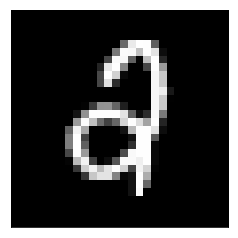

In [14]:
fig = plt.figure()
plt.imshow(train[10000][:,:,0], cmap='gray', interpolation='none')
plt.xticks([])
plt.yticks([])

### Create a consistent model and compile it

In [6]:
model = Sequential()

model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

### Fit the network

In [11]:
model.fit(train, y, batch_size=200, epochs=5, verbose=2)

Epoch 1/5
 - 6s - loss: 0.0064 - acc: 0.9981
Epoch 2/5
 - 6s - loss: 0.0039 - acc: 0.9990
Epoch 3/5
 - 5s - loss: 0.0034 - acc: 0.9990
Epoch 4/5
 - 5s - loss: 0.0053 - acc: 0.9983
Epoch 5/5
 - 5s - loss: 0.0056 - acc: 0.9985


### Making predictions and converting from categorical to classed

In [12]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

In [13]:
output = pd.DataFrame(columns = ['ImageId', 'Label'])
output['ImageId'] = range(1, 28001)
output['Label'] = predictions
output.to_csv('Output1.csv', index = False)

## I reached top 28% on the leaderboard with the final score 0.99357. To increase the score we can use Generators, but it will takes much more time to fit it.